## 1. 导入数据包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

%matplotlib inline

## 2. 数据探索
### 2.1 读取数据

In [2]:
data = pd.read_csv("day.csv")
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
data.shape

(731, 16)

### 2.2 数据准备

In [4]:
X = data.drop(['instant','dteday','yr','casual','registered','cnt'],axis=1)
y = data['cnt'].values
columns = X.columns

X_train = X[0:365]
X_test = X[365:]
y_train = y[0:365]
y_test = y[365:]

# X_train = data_train.drop(['instant','dteday','yr','casual','registered','cnt'],axis=1)
# y_train = data_train['cnt'].values
# X_test = data_test.drop(['instant','dteday','yr','casual','registered','cnt'],axis=1)
# y_test = data_test['cnt'].values
X_test.head()

season  mnth  holiday  weekday  workingday  weathersit      temp  \
365       1     1        0        0           0           1  0.370000   
366       1     1        1        1           0           1  0.273043   
367       1     1        0        2           1           1  0.150000   
368       1     1        0        3           1           2  0.107500   
369       1     1        0        4           1           1  0.265833   

        atemp       hum  windspeed  
365  0.375621  0.692500   0.192167  
366  0.252304  0.381304   0.329665  
367  0.126275  0.441250   0.365671  
368  0.119337  0.414583   0.184700  
369  0.278412  0.524167   0.129987

### 2.3 特征工程

In [5]:
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))


D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 3. 模型选择
### 3.1 线性回归

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)

In [7]:
print ('The r2 score of LinearRegression on test is', r2_score(y_test, y_test_pred_lr))
print ('The r2 score of LinearRegression on test is', r2_score(y_train, y_train_pred_lr))

The r2 score of LinearRegression on test is -0.6965661915185128
The r2 score of LinearRegression on test is 0.758519666910396


### 3.2 岭回归

In [8]:
from sklearn.linear_model import RidgeCV

alphas = [ 0.01, 0.1, 1, 10,100]

ridge = RidgeCV(alphas=alphas,store_cv_values=True)

ridge.fit(X_train,y_train)

y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

print ('The r2 score of RidgeCV on test is', r2_score(y_test, y_test_pred_ridge))
print ('The r2 score of RidgeCV on train is', r2_score(y_train, y_train_pred_ridge))

The r2 score of RidgeCV on test is -0.7011352437314151
The r2 score of RidgeCV on train is 0.7576975492426061


### 可视化

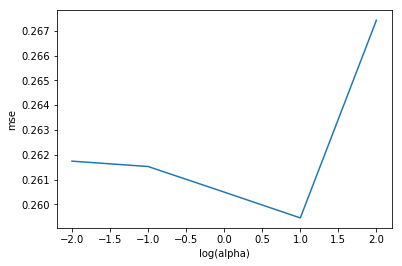

columns                  coef_lr              coef_ridge
6        temp     [0.6552364353084569]   [0.35015384686244877]
0      season    [0.29517804267926906]   [0.27576542513648067]
3     weekday    [0.03533240218145289]   [0.03399899497824491]
4  workingday  [0.0072862815746973794]  [0.007293423015388538]
1        mnth  [0.0038685715616474103]  [0.018836006955483355]
7       atemp  [-0.021140727599850376]   [0.28047096356275186]
2     holiday   [-0.03601989254948194]  [-0.03364170993901818]
8         hum   [-0.05942477581033447]  [-0.06294976734687995]
9   windspeed   [-0.12391854742331623]  [-0.11713890245230485]
5  weathersit    [-0.2256947758690207]   [-0.2164268827072564]

In [9]:
mse_mean = np.mean(ridge.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

### 3.3 Lasso

In [10]:
from sklearn.linear_model import LassoCV

lasso = LassoCV()

lasso.fit(X_train,y_train)

y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print ('The r2 score of LassoCV on test is', r2_score(y_test, y_test_pred_lasso))
print ('The r2 score of LassoCV on train is', r2_score(y_train, y_train_pred_lasso))

D:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The r2 score of LassoCV on test is -0.863855024061922
The r2 score of LassoCV on train is 0.692374913339408


### 可视化

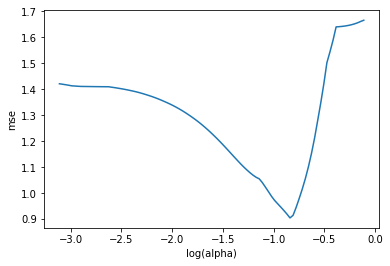

alpha is: 0.14527588617252218


columns                  coef_lr              coef_ridge  coef_lasso
6        temp     [0.6552364353084569]   [0.35015384686244877]    0.067640
0      season    [0.29517804267926906]   [0.27576542513648067]    0.193429
3     weekday    [0.03533240218145289]   [0.03399899497824491]    0.000000
4  workingday  [0.0072862815746973794]  [0.007293423015388538]    0.000000
1        mnth  [0.0038685715616474103]  [0.018836006955483355]    0.000000
7       atemp  [-0.021140727599850376]   [0.28047096356275186]    0.476180
2     holiday   [-0.03601989254948194]  [-0.03364170993901818]   -0.000000
8         hum   [-0.05942477581033447]  [-0.06294976734687995]   -0.000000
9   windspeed   [-0.12391854742331623]  [-0.11713890245230485]   -0.000000
5  weathersit    [-0.2256947758690207]   [-0.2164268827072564]   -0.127561

In [11]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 

plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    

print ('alpha is:', lasso.alpha_)

fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)